Сначала загрузим датасет

In [1]:
!hadoop fs -mkdir /hw1-part2-task1

mkdir: `/hw1-part2-task1': File exists


In [2]:
!hadoop fs -put SW_EpisodeIV.txt /hw1-part2-task1

put: `/hw1-part2-task1/SW_EpisodeIV.txt': File exists


In [3]:
!hadoop fs -put SW_EpisodeV.txt /hw1-part2-task1

put: `/hw1-part2-task1/SW_EpisodeV.txt': File exists


In [4]:
!hadoop fs -put SW_EpisodeVI.txt /hw1-part2-task1

put: `/hw1-part2-task1/SW_EpisodeVI.txt': File exists


In [5]:
!hadoop fs -ls /hw1-part2-task1

Found 7 items
-rw-r--r--   3 root supergroup      78278 2023-12-06 20:45 /hw1-part2-task1/SW_EpisodeIV.txt
-rw-r--r--   3 root supergroup      55487 2023-12-06 20:45 /hw1-part2-task1/SW_EpisodeV.txt
-rw-r--r--   3 root supergroup      48176 2023-12-06 20:45 /hw1-part2-task1/SW_EpisodeVI.txt
drwxr-xr-x   - root supergroup          0 2023-12-06 23:20 /hw1-part2-task1/res4
drwxr-xr-x   - root supergroup          0 2023-12-06 23:18 /hw1-part2-task1/res4.txt
drwxr-xr-x   - root supergroup          0 2023-12-06 23:24 /hw1-part2-task1/res5
drwxr-xr-x   - root supergroup          0 2023-12-06 23:25 /hw1-part2-task1/res6


Теперь напишем код

In [6]:
%%file part2_task1.py

from mrjob.job import MRJob, MRStep

class Task(MRJob):
    def mapper(self, _, line):
        character = line.replace('"', '').split(' ')[1]
        yield (character, 1)

    def combiner(self, character, counts):
        yield (character, sum(counts))

    def reducer(self, character, character_counts):
        yield None, (character, sum(character_counts))

    def get_top(self, _, character_counts):
        sorted_character_counts = sorted(character_counts, key = lambda pair: pair[1], reverse = True)
        for character, count in sorted_character_counts[:20]:
            yield (character, count)

    def steps(self):
        return [
            MRStep(mapper=self.mapper, combiner=self.combiner, reducer=self.reducer),
            MRStep(reducer=self.get_top)
        ]

if __name__ == "__main__":
    Task.run()

Overwriting part2_task1.py


In [7]:
!pip install mrjob

Локальный запуск

In [8]:
!python3 part2_task1.py SW_EpisodeIV.txt > local_res4.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/part2_task1.root.20231206.203445.441669
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/part2_task1.root.20231206.203445.441669/output
Streaming final output from /tmp/part2_task1.root.20231206.203445.441669/output...
Removing temp directory /tmp/part2_task1.root.20231206.203445.441669...


In [9]:
!python3 part2_task1.py SW_EpisodeV.txt > local_res5.txt
!python3 part2_task1.py SW_EpisodeVI.txt > local_res6.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/part2_task1.root.20231206.203446.513691
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/part2_task1.root.20231206.203446.513691/output
Streaming final output from /tmp/part2_task1.root.20231206.203446.513691/output...
Removing temp directory /tmp/part2_task1.root.20231206.203446.513691...
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/part2_task1.root.20231206.203446.893139
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/part2_task1.root.20231206.203446.893139/output
Streaming final output from /tmp/part2_task1.root.20231206.203446.893139/output...
Removing temp directory /tmp/part2_task1.root.20231206.203446.893139...


In [10]:
!python3 part2_task1.py SW_EpisodeIV.txt SW_EpisodeV.txt SW_EpisodeVI.txt > local_res_all.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/part2_task1.root.20231206.203450.024700
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/part2_task1.root.20231206.203450.024700/output
Streaming final output from /tmp/part2_task1.root.20231206.203450.024700/output...
Removing temp directory /tmp/part2_task1.root.20231206.203450.024700...


Запуск на кластере

In [11]:
!python3 part2_task1.py -r hadoop hdfs://namenode:8020/hw1-part2-task1/SW_EpisodeIV.txt -o hdfs://namenode:8020/hw1-part2-task1/res4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/part2_task1.root.20231206.203455.918321
uploading working dir files to hdfs:///user/root/tmp/mrjob/part2_task1.root.20231206.203455.918321/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/part2_task1.root.20231206.203455.918321/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar8724062230225926697/] [] /tmp/streamjob7202560966046395861.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701877008637_001

In [12]:
!hadoop fs -ls hdfs://namenode:8020/hw1-part2-task1/res4

Found 2 items
-rw-r--r--   3 root supergroup          0 2023-12-06 23:20 hdfs://namenode:8020/hw1-part2-task1/res4/_SUCCESS
-rw-r--r--   3 root supergroup        221 2023-12-06 23:20 hdfs://namenode:8020/hw1-part2-task1/res4/part-00000


In [13]:
!hadoop fs -cat hdfs://namenode:8020/hw1-part2-task1/res4/part-00000

"LUKE"	254
"HAN"	153
"THREEPIO"	119
"BEN"	82
"LEIA"	57
"RED"	49
"VADER"	41
"BIGGS"	34
"TARKIN"	28
"OWEN"	25
"GOLD"	23
"TROOPER"	20
"WEDGE"	14
"OFFICER"	12
"FIRST"	7
"JABBA"	6
"INTERCOM"	6
"GREEDO"	6
"DODONNA"	6
"DEATH"	6


In [14]:
!hadoop fs -cat hdfs://namenode:8020/hw1-part2-task1/res4/part-00000 > cluster_res4.txt

In [15]:
!python3 part2_task1.py -r hadoop hdfs://namenode:8020/hw1-part2-task1/SW_EpisodeV.txt -o hdfs://namenode:8020/hw1-part2-task1/res5
!hadoop fs -cat hdfs://namenode:8020/hw1-part2-task1/res5/part-00000 > cluster_res5.txt
!python3 part2_task1.py -r hadoop hdfs://namenode:8020/hw1-part2-task1/SW_EpisodeVI.txt -o hdfs://namenode:8020/hw1-part2-task1/res6
!hadoop fs -cat hdfs://namenode:8020/hw1-part2-task1/res6/part-00000 > cluster_res6.txt

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/part2_task1.root.20231206.203522.511234
uploading working dir files to hdfs:///user/root/tmp/mrjob/part2_task1.root.20231206.203522.511234/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/part2_task1.root.20231206.203522.511234/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar2197006424510186454/] [] /tmp/streamjob5458930437269849320.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701877008637_001

In [ ]:
!python3 part2_task1.py -r hadoop hdfs://namenode:8020/hw1-part2-task1/SW_EpisodeIV.txt hadoop hdfs://namenode:8020/hw1-part2-task1/SW_EpisodeV.txt  hadoop hdfs://namenode:8020/hw1-part2-task1/SW_EpisodeVI.txt -o hdfs://namenode:8020/hw1-part2-task1/res_all
!hadoop fs -cat hdfs://namenode:8020/hw1-part2-task1/res_all/part-00000 > cluster_res_all.txt

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/part2_task1.root.20231206.203644.439511
uploading working dir files to hdfs:///user/root/tmp/mrjob/part2_task1.root.20231206.203644.439511/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/part2_task1.root.20231206.203644.439511/files/


И графики

In [35]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.5 kB/s eta 0:00:0000:0100:17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 16.3 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 99.7 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 109.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 206.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 225.6 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 460.4 kB/s eta 0:00:0000:0100:01


In [16]:
import matplotlib.pyplot as plt

def graphic(type, episode):
    characters = []
    results = []
    with open(f"{type}_res{episode}.txt", 'r') as f:
        for character_count in f:
            character, count = character_count.replace('"', '').replace('\n', '').split('\t')
            characters.append(character)
            results.append(int(count))
    print(f"Edisode №{episode} ({type})")
    plt.figure(figsize=(30, 23))
    plt.bar(x=characters, height=results)

Edisode №4 (local)


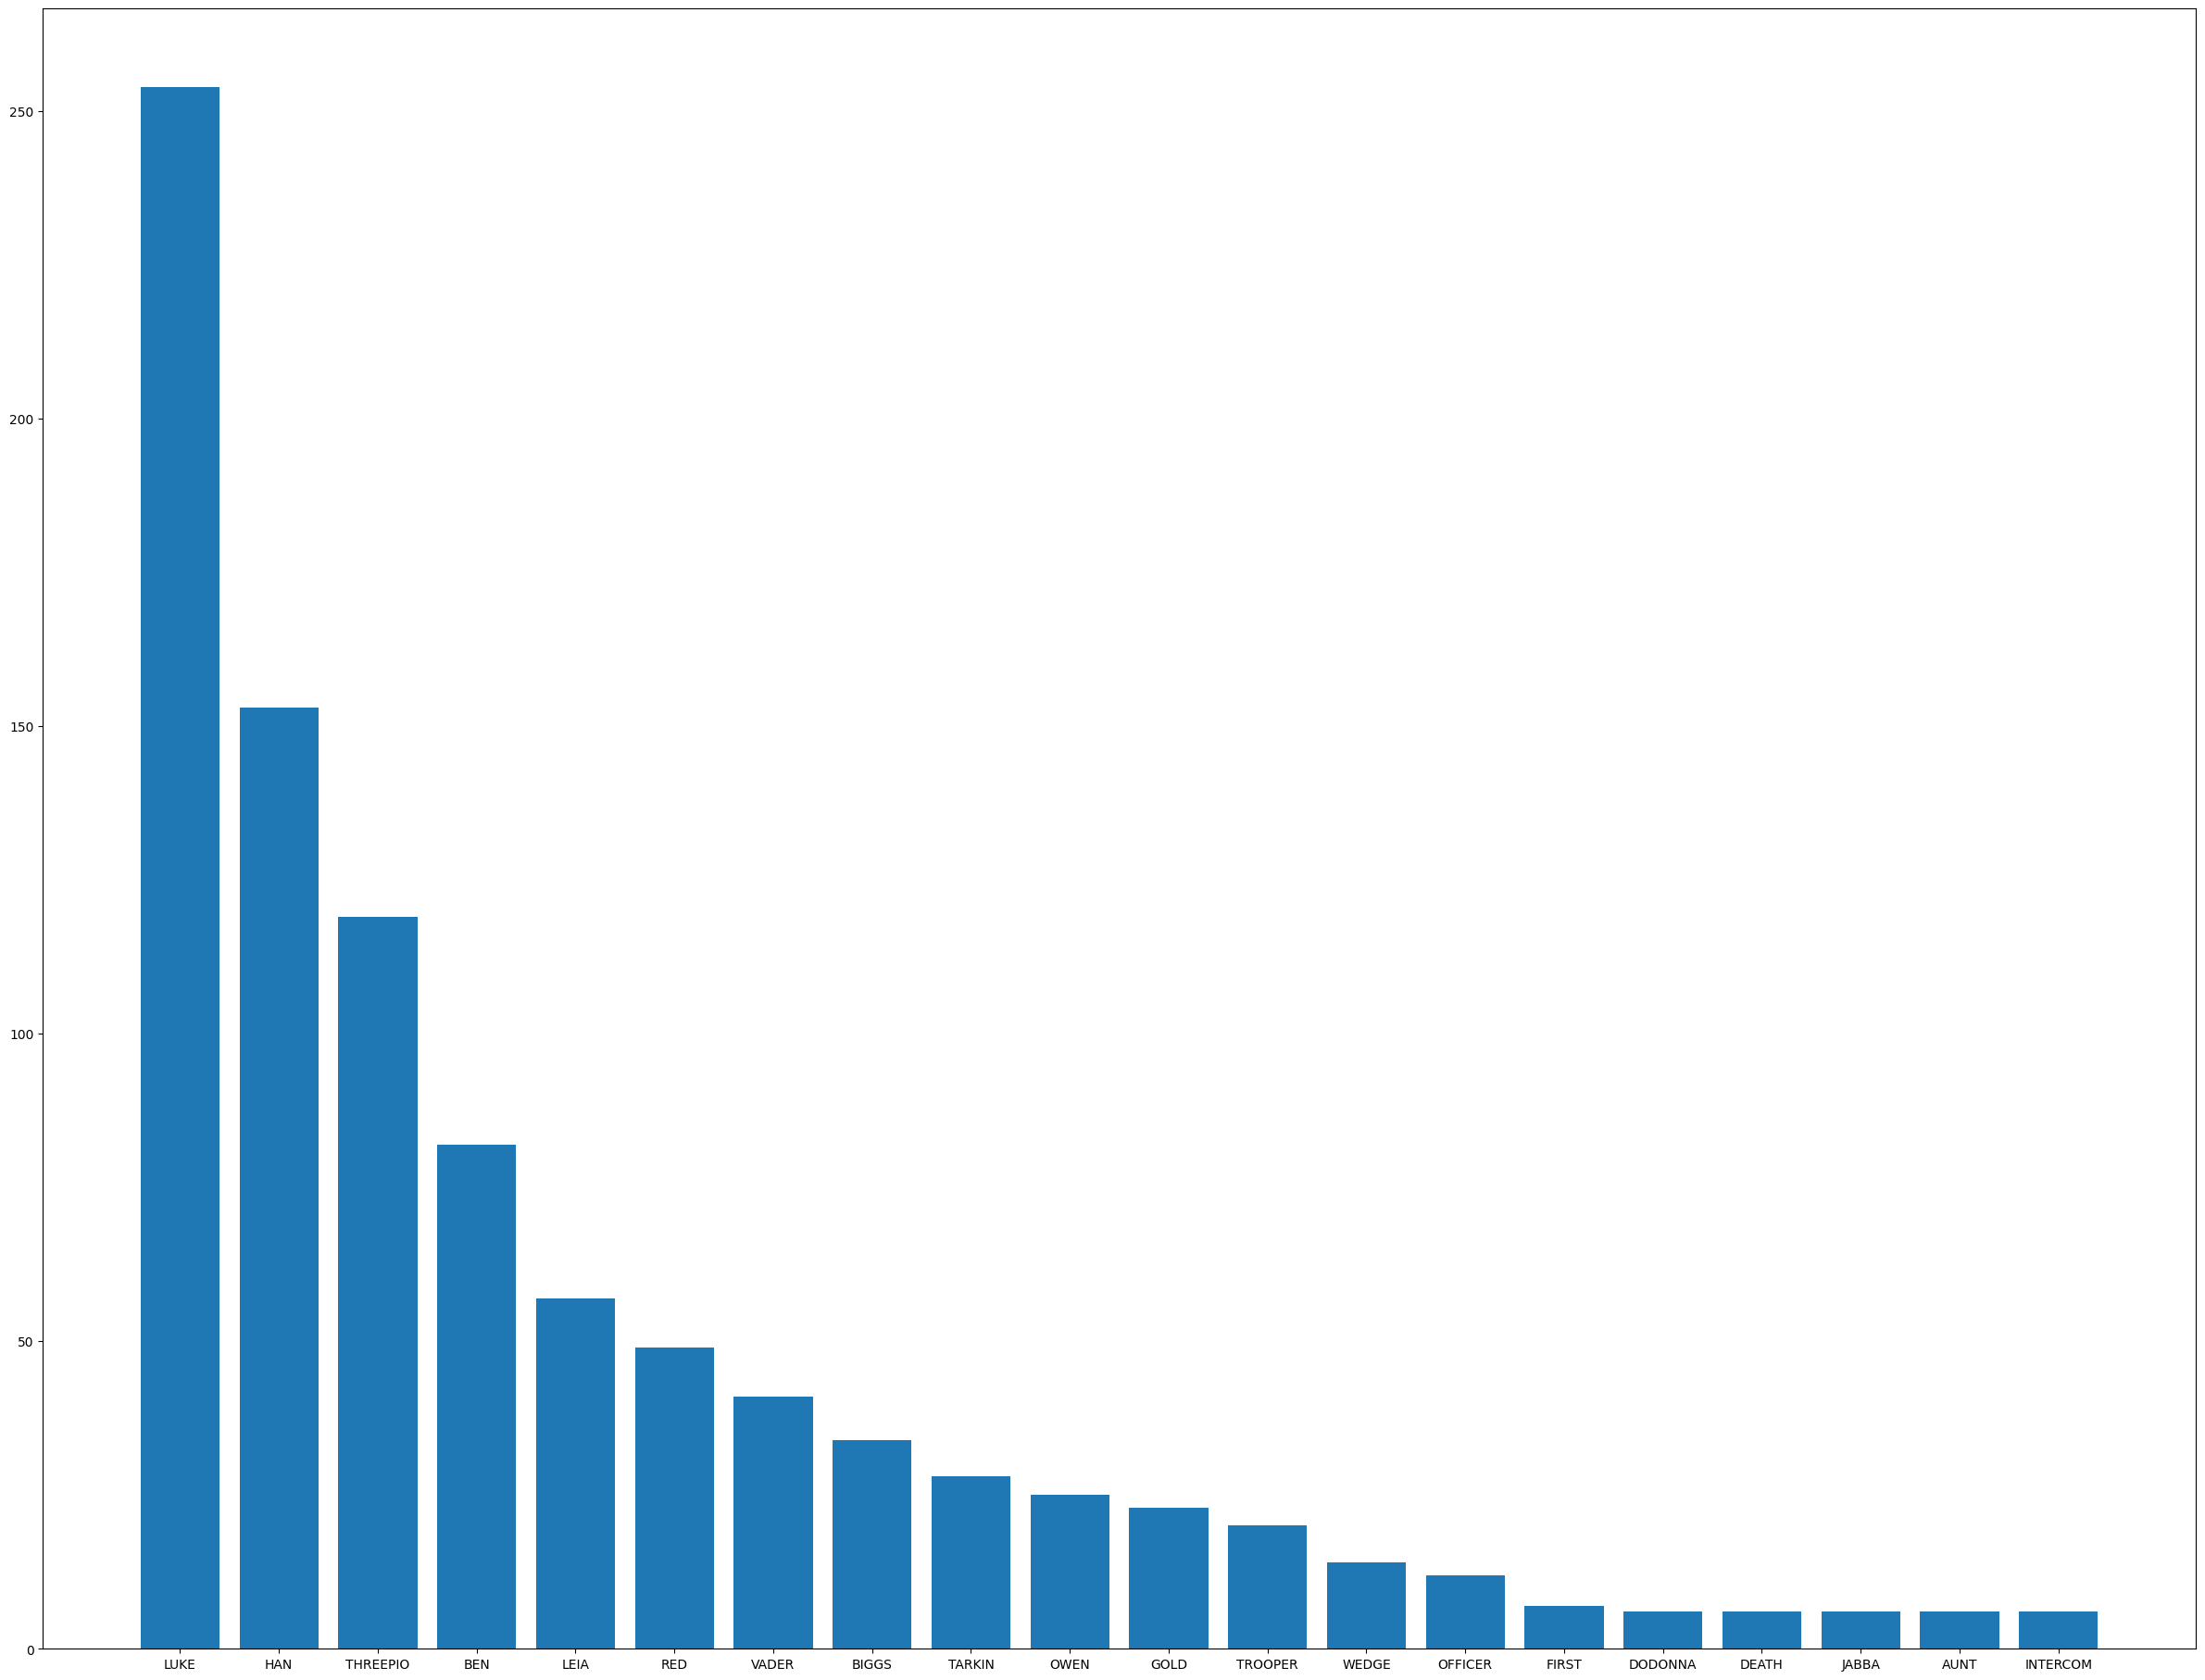

In [17]:
graphic('local', 4)

Edisode №4 (cluster)


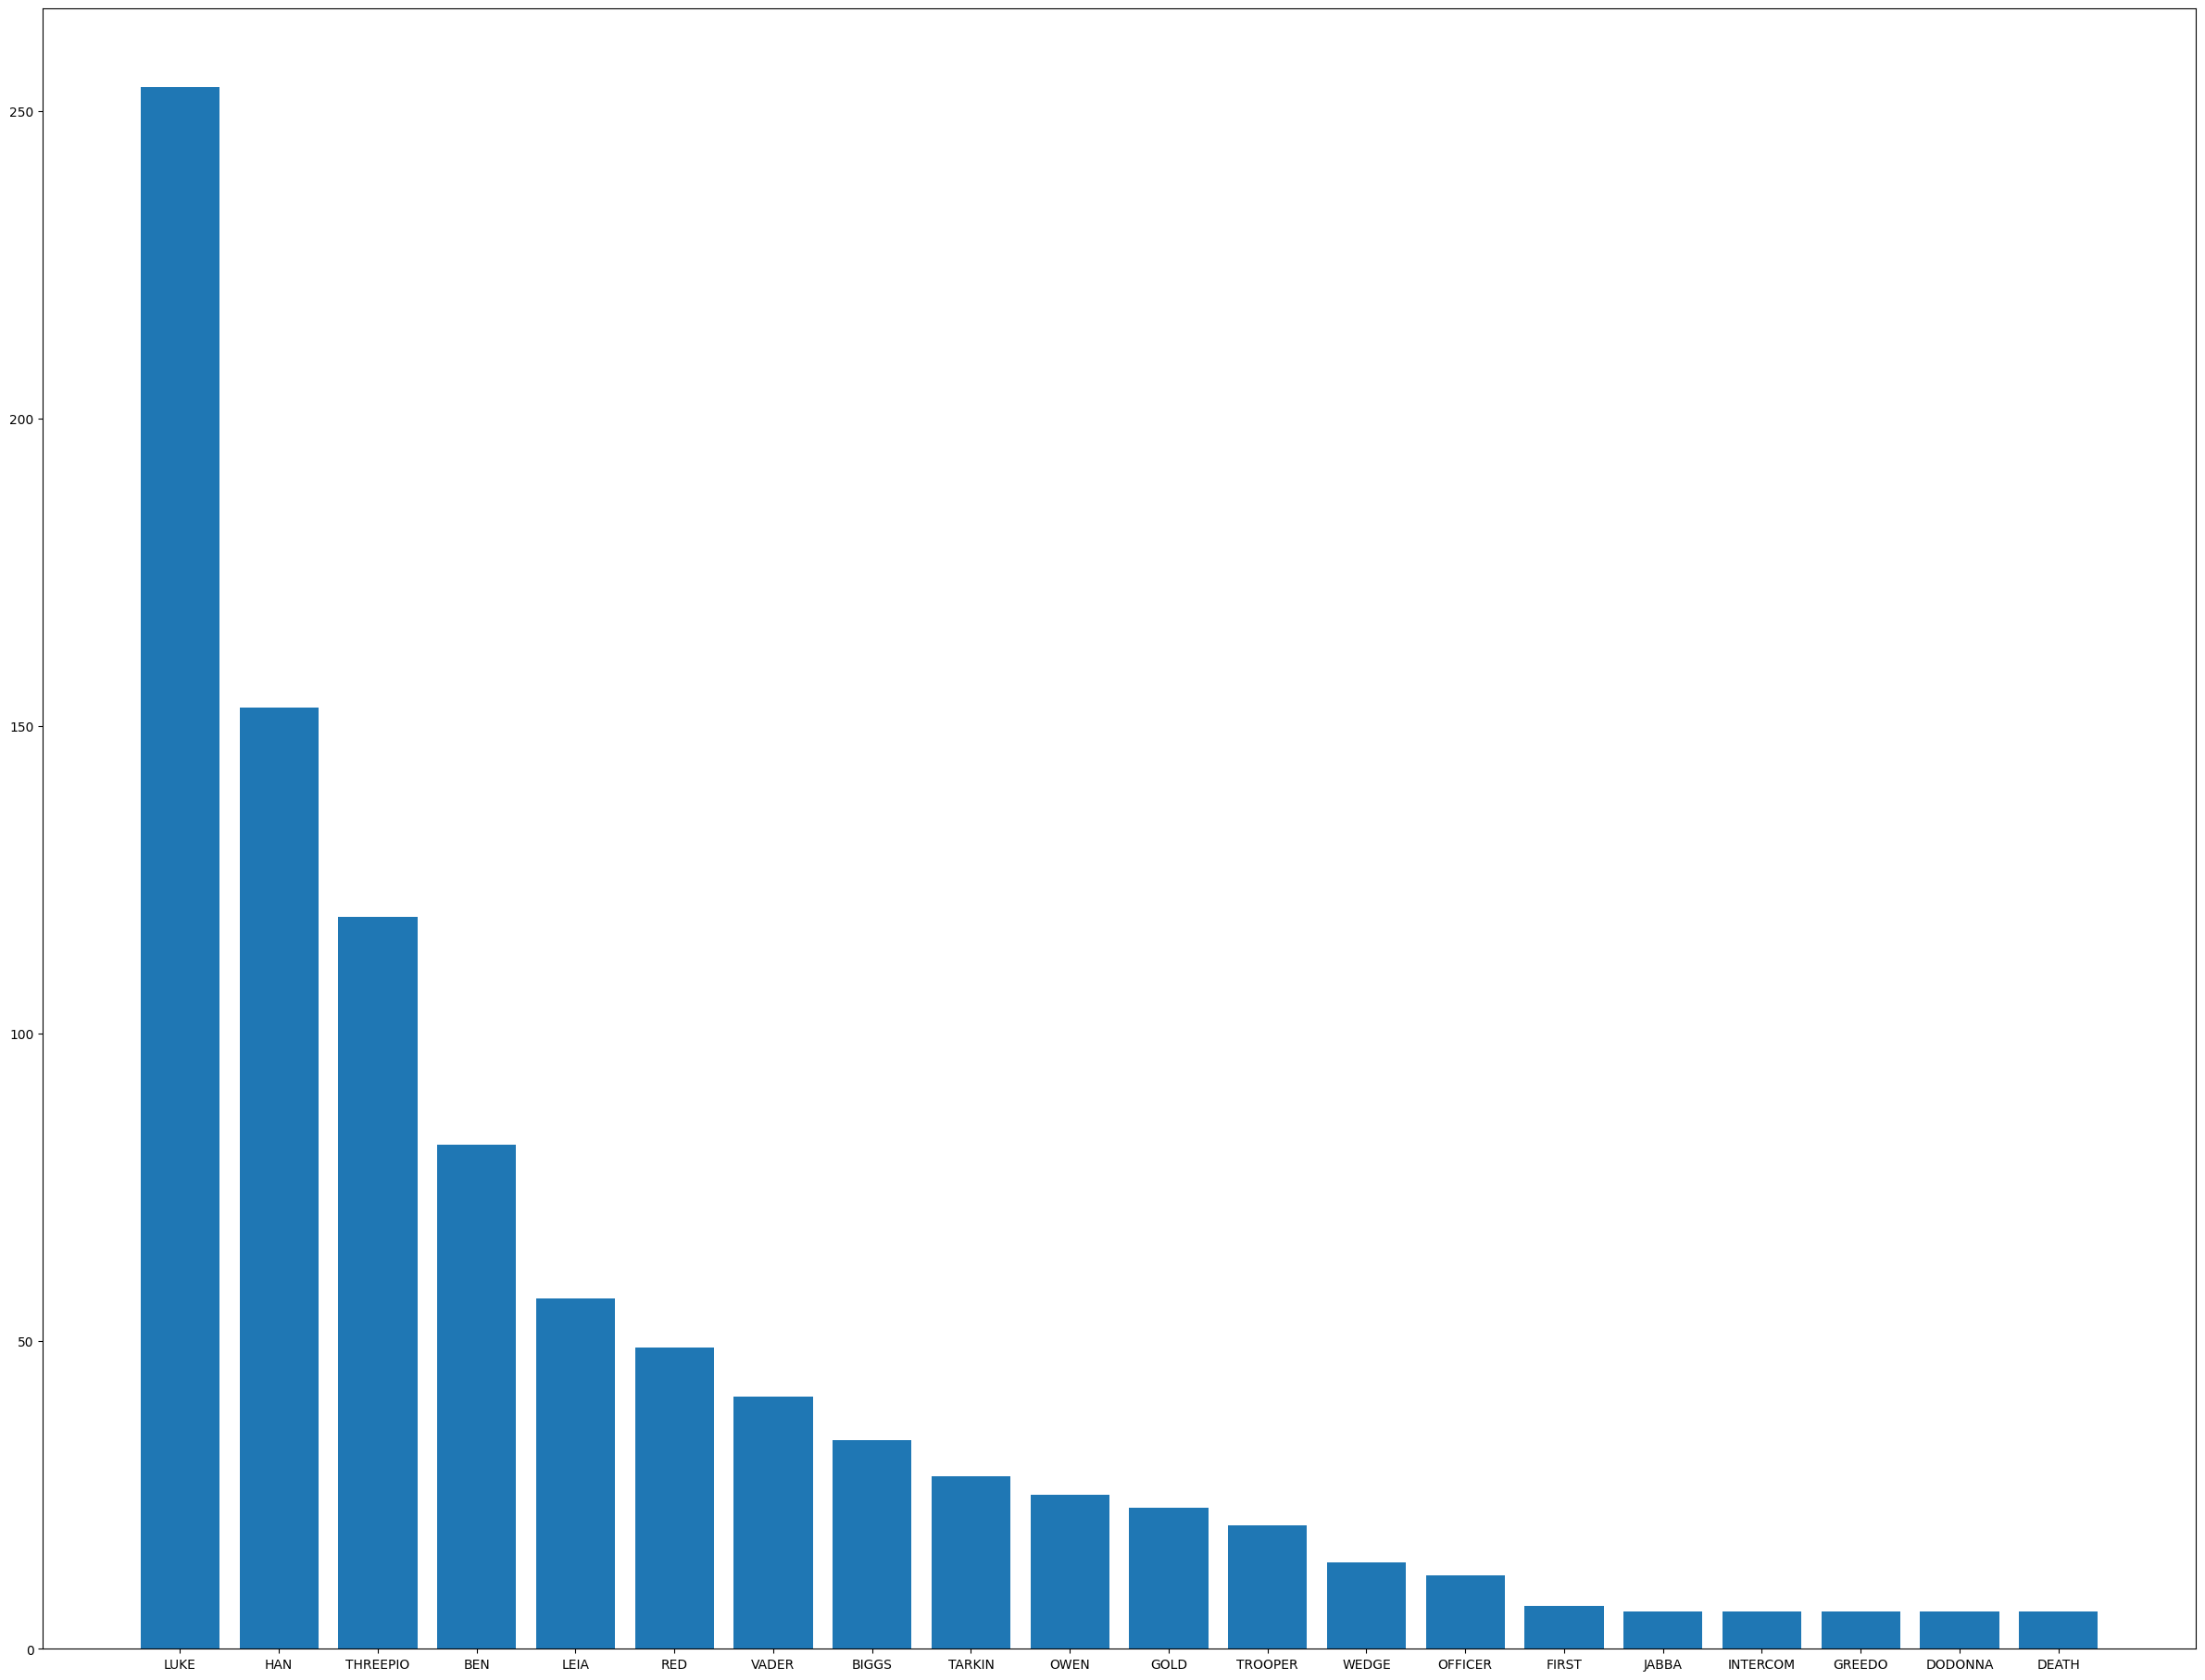

In [18]:
graphic('cluster', 4)

Edisode №5 (local)


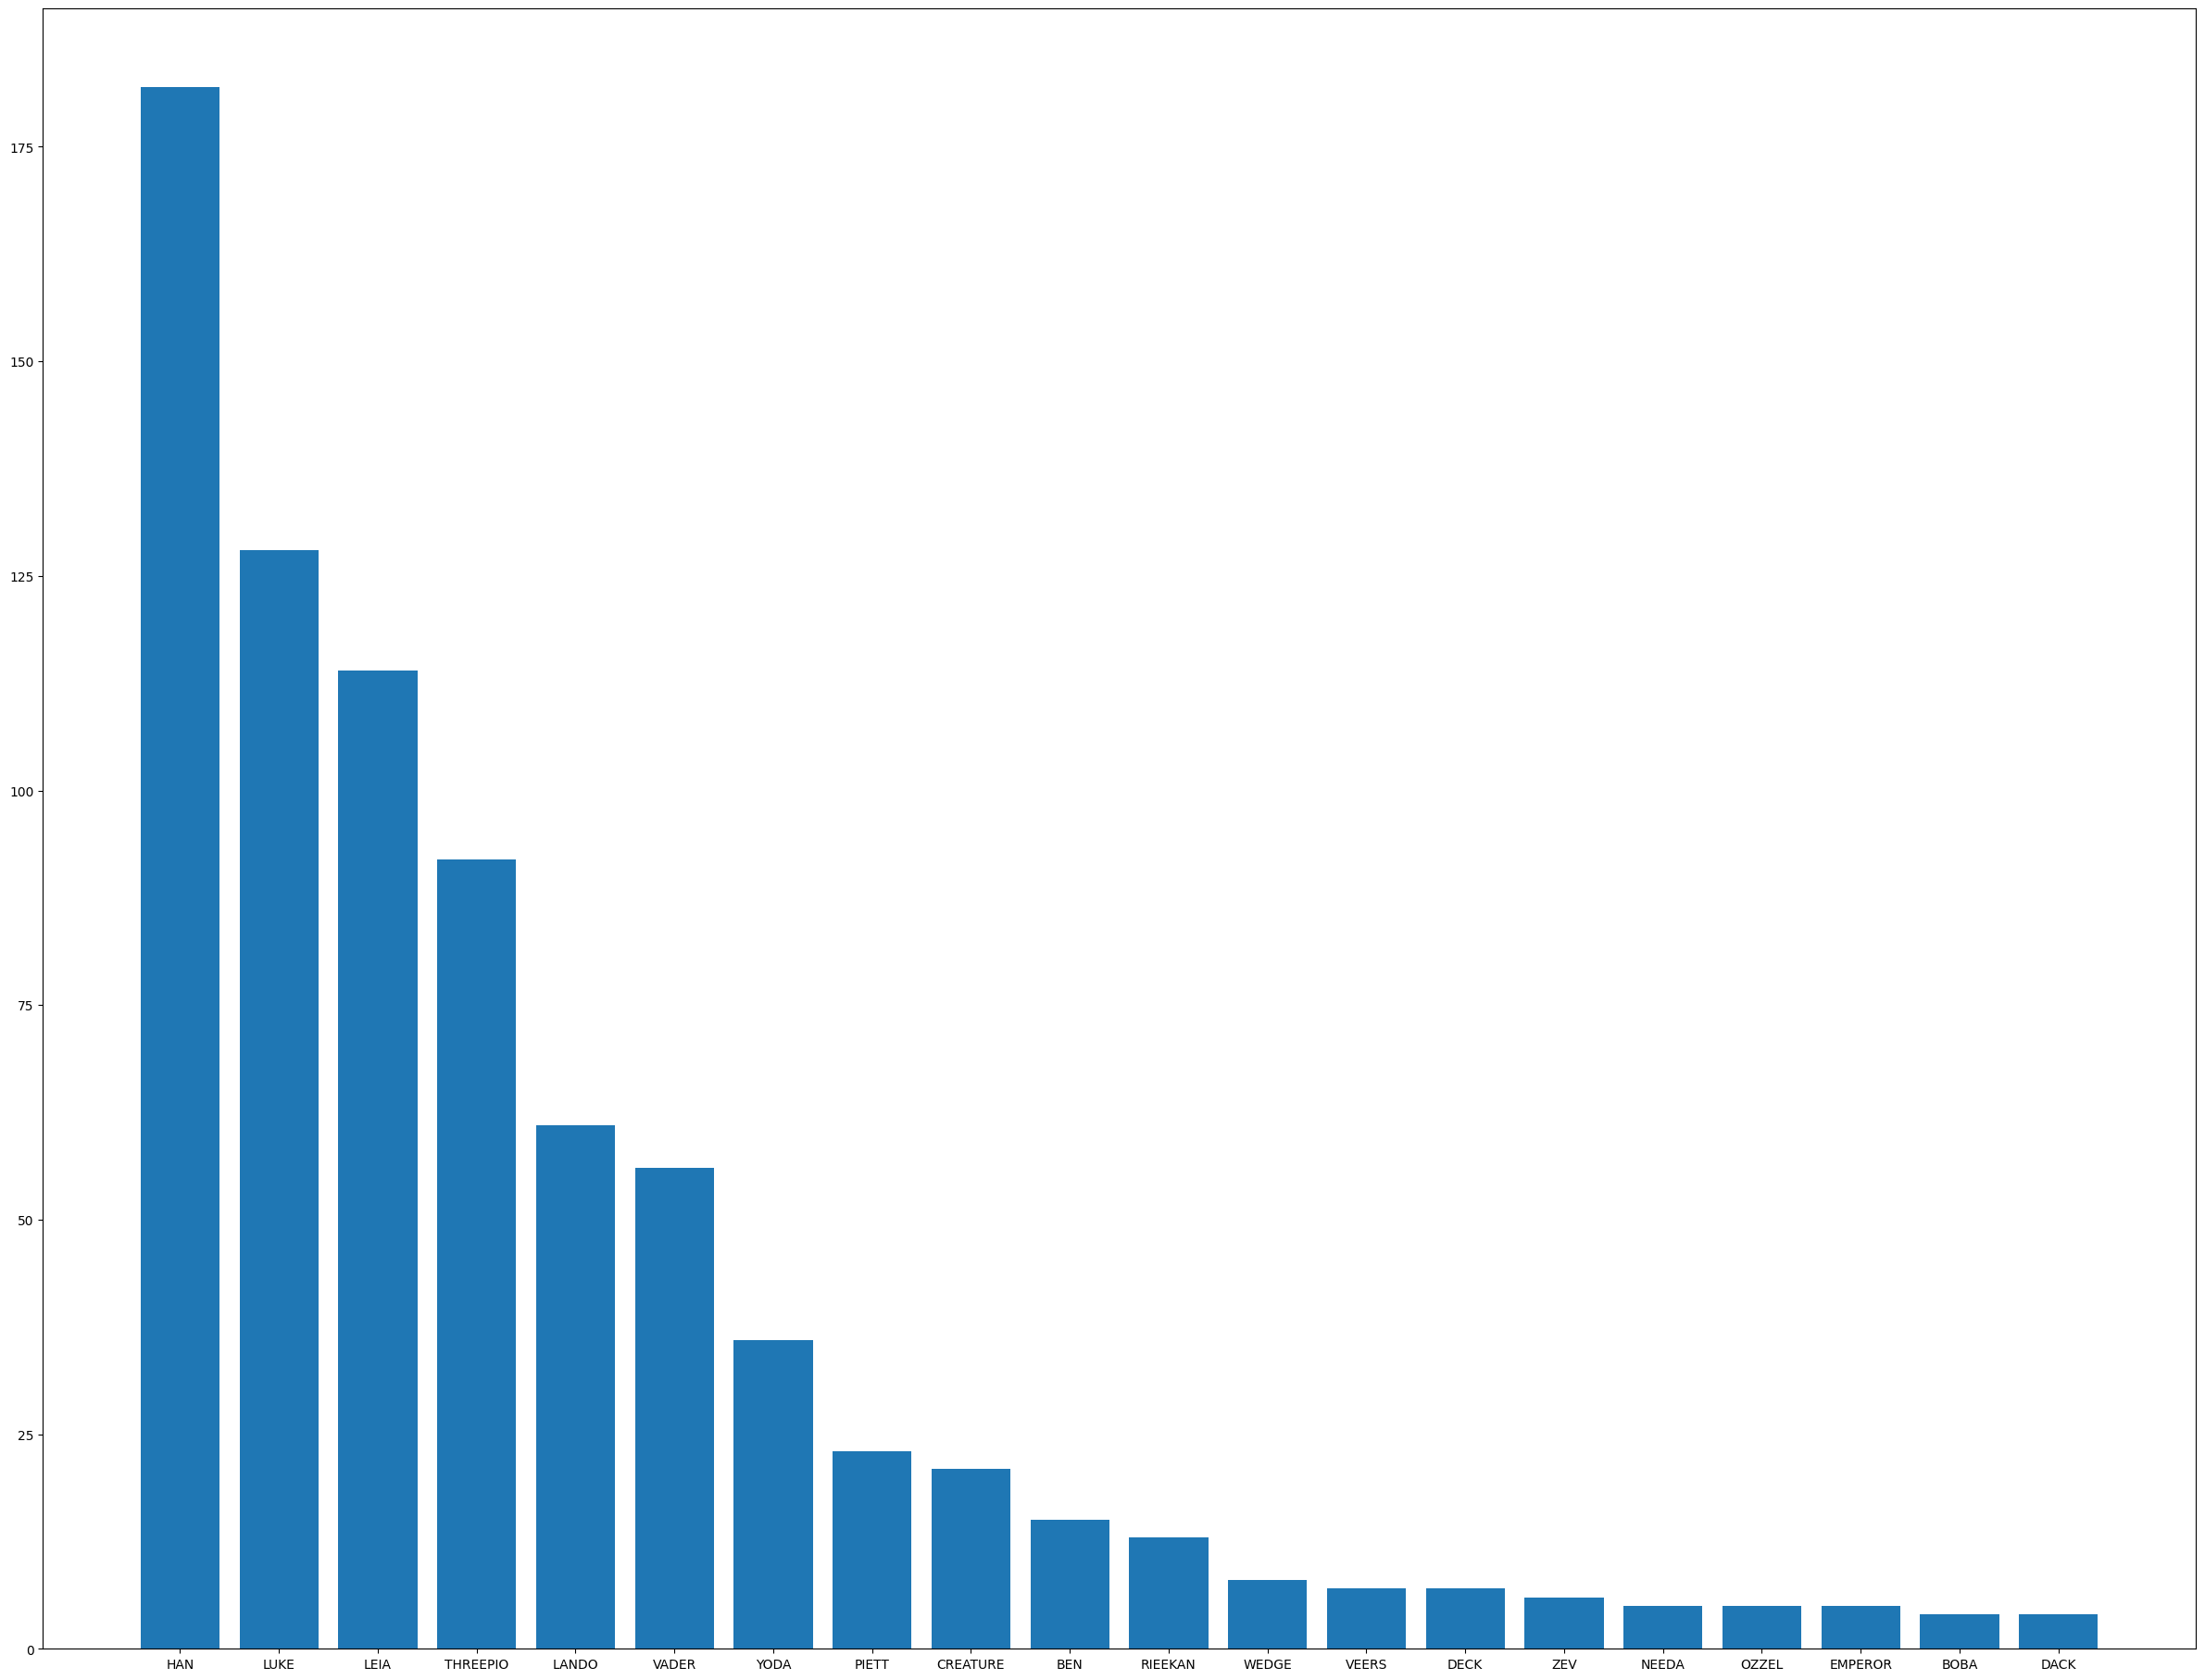

In [19]:
graphic('local', 5)

Edisode №5 (cluster)


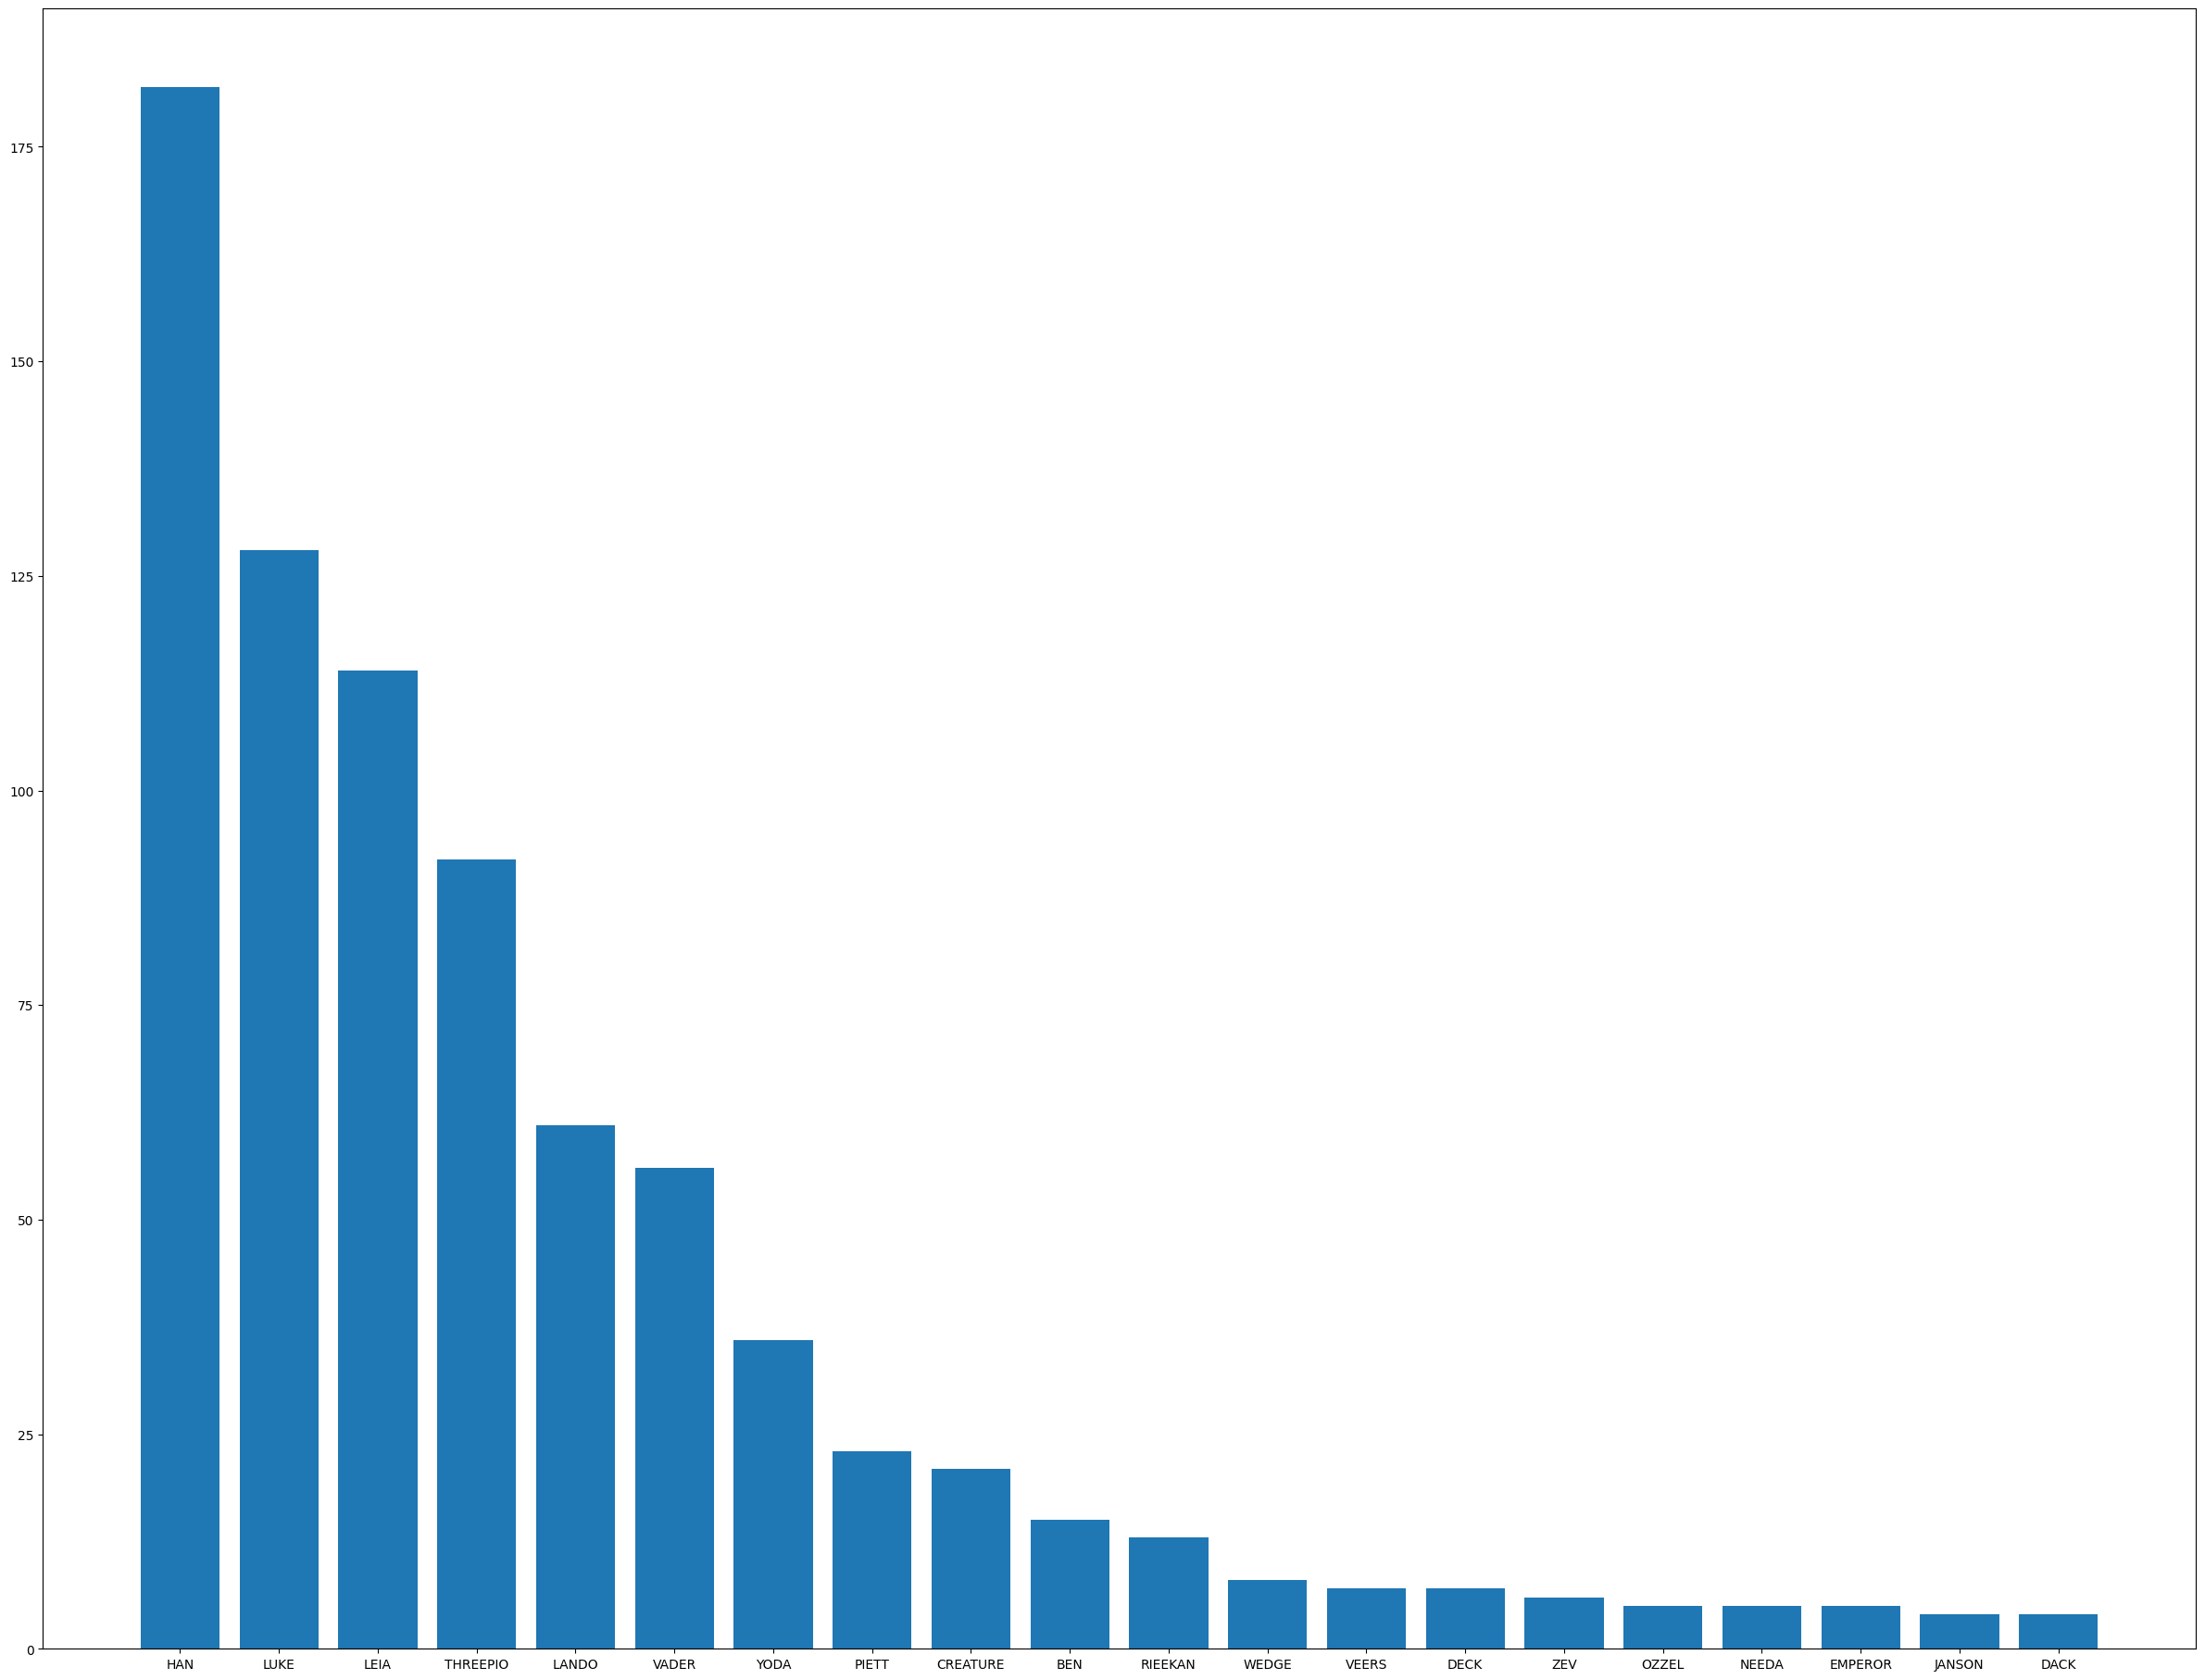

In [20]:
graphic('cluster', 5)

Edisode №6 (local)


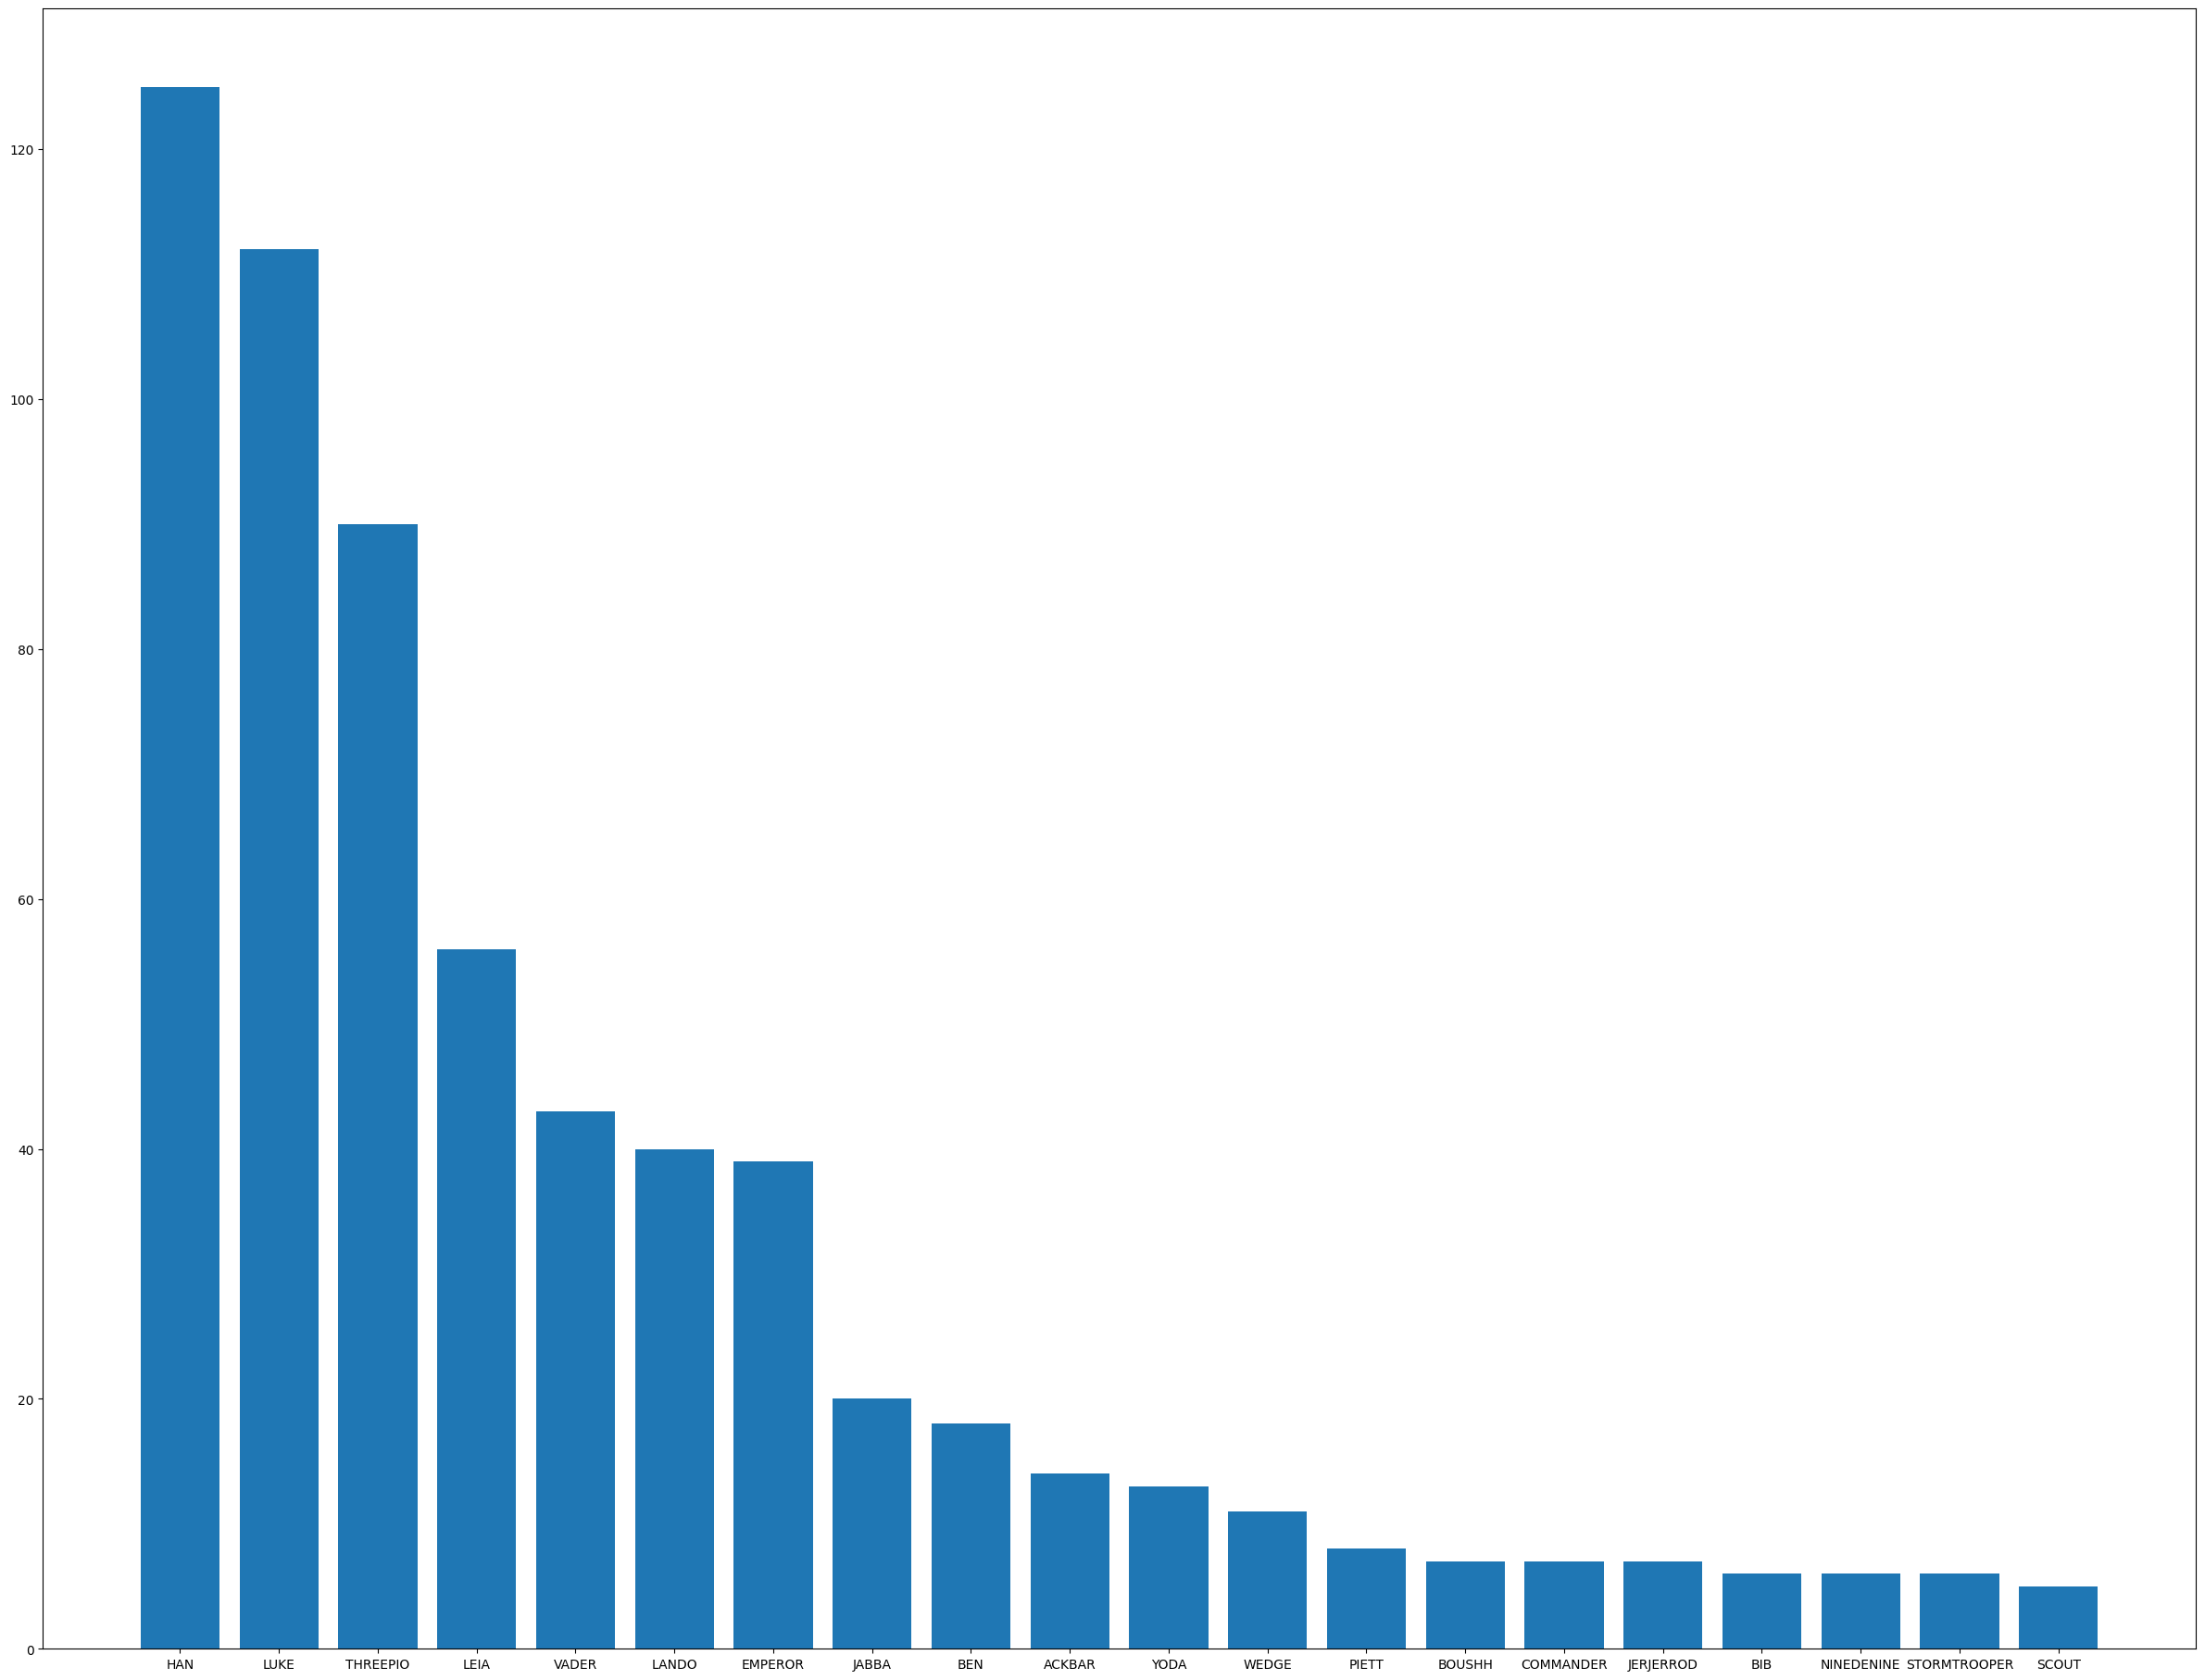

In [21]:
graphic('local', 6)

Edisode №6 (cluster)


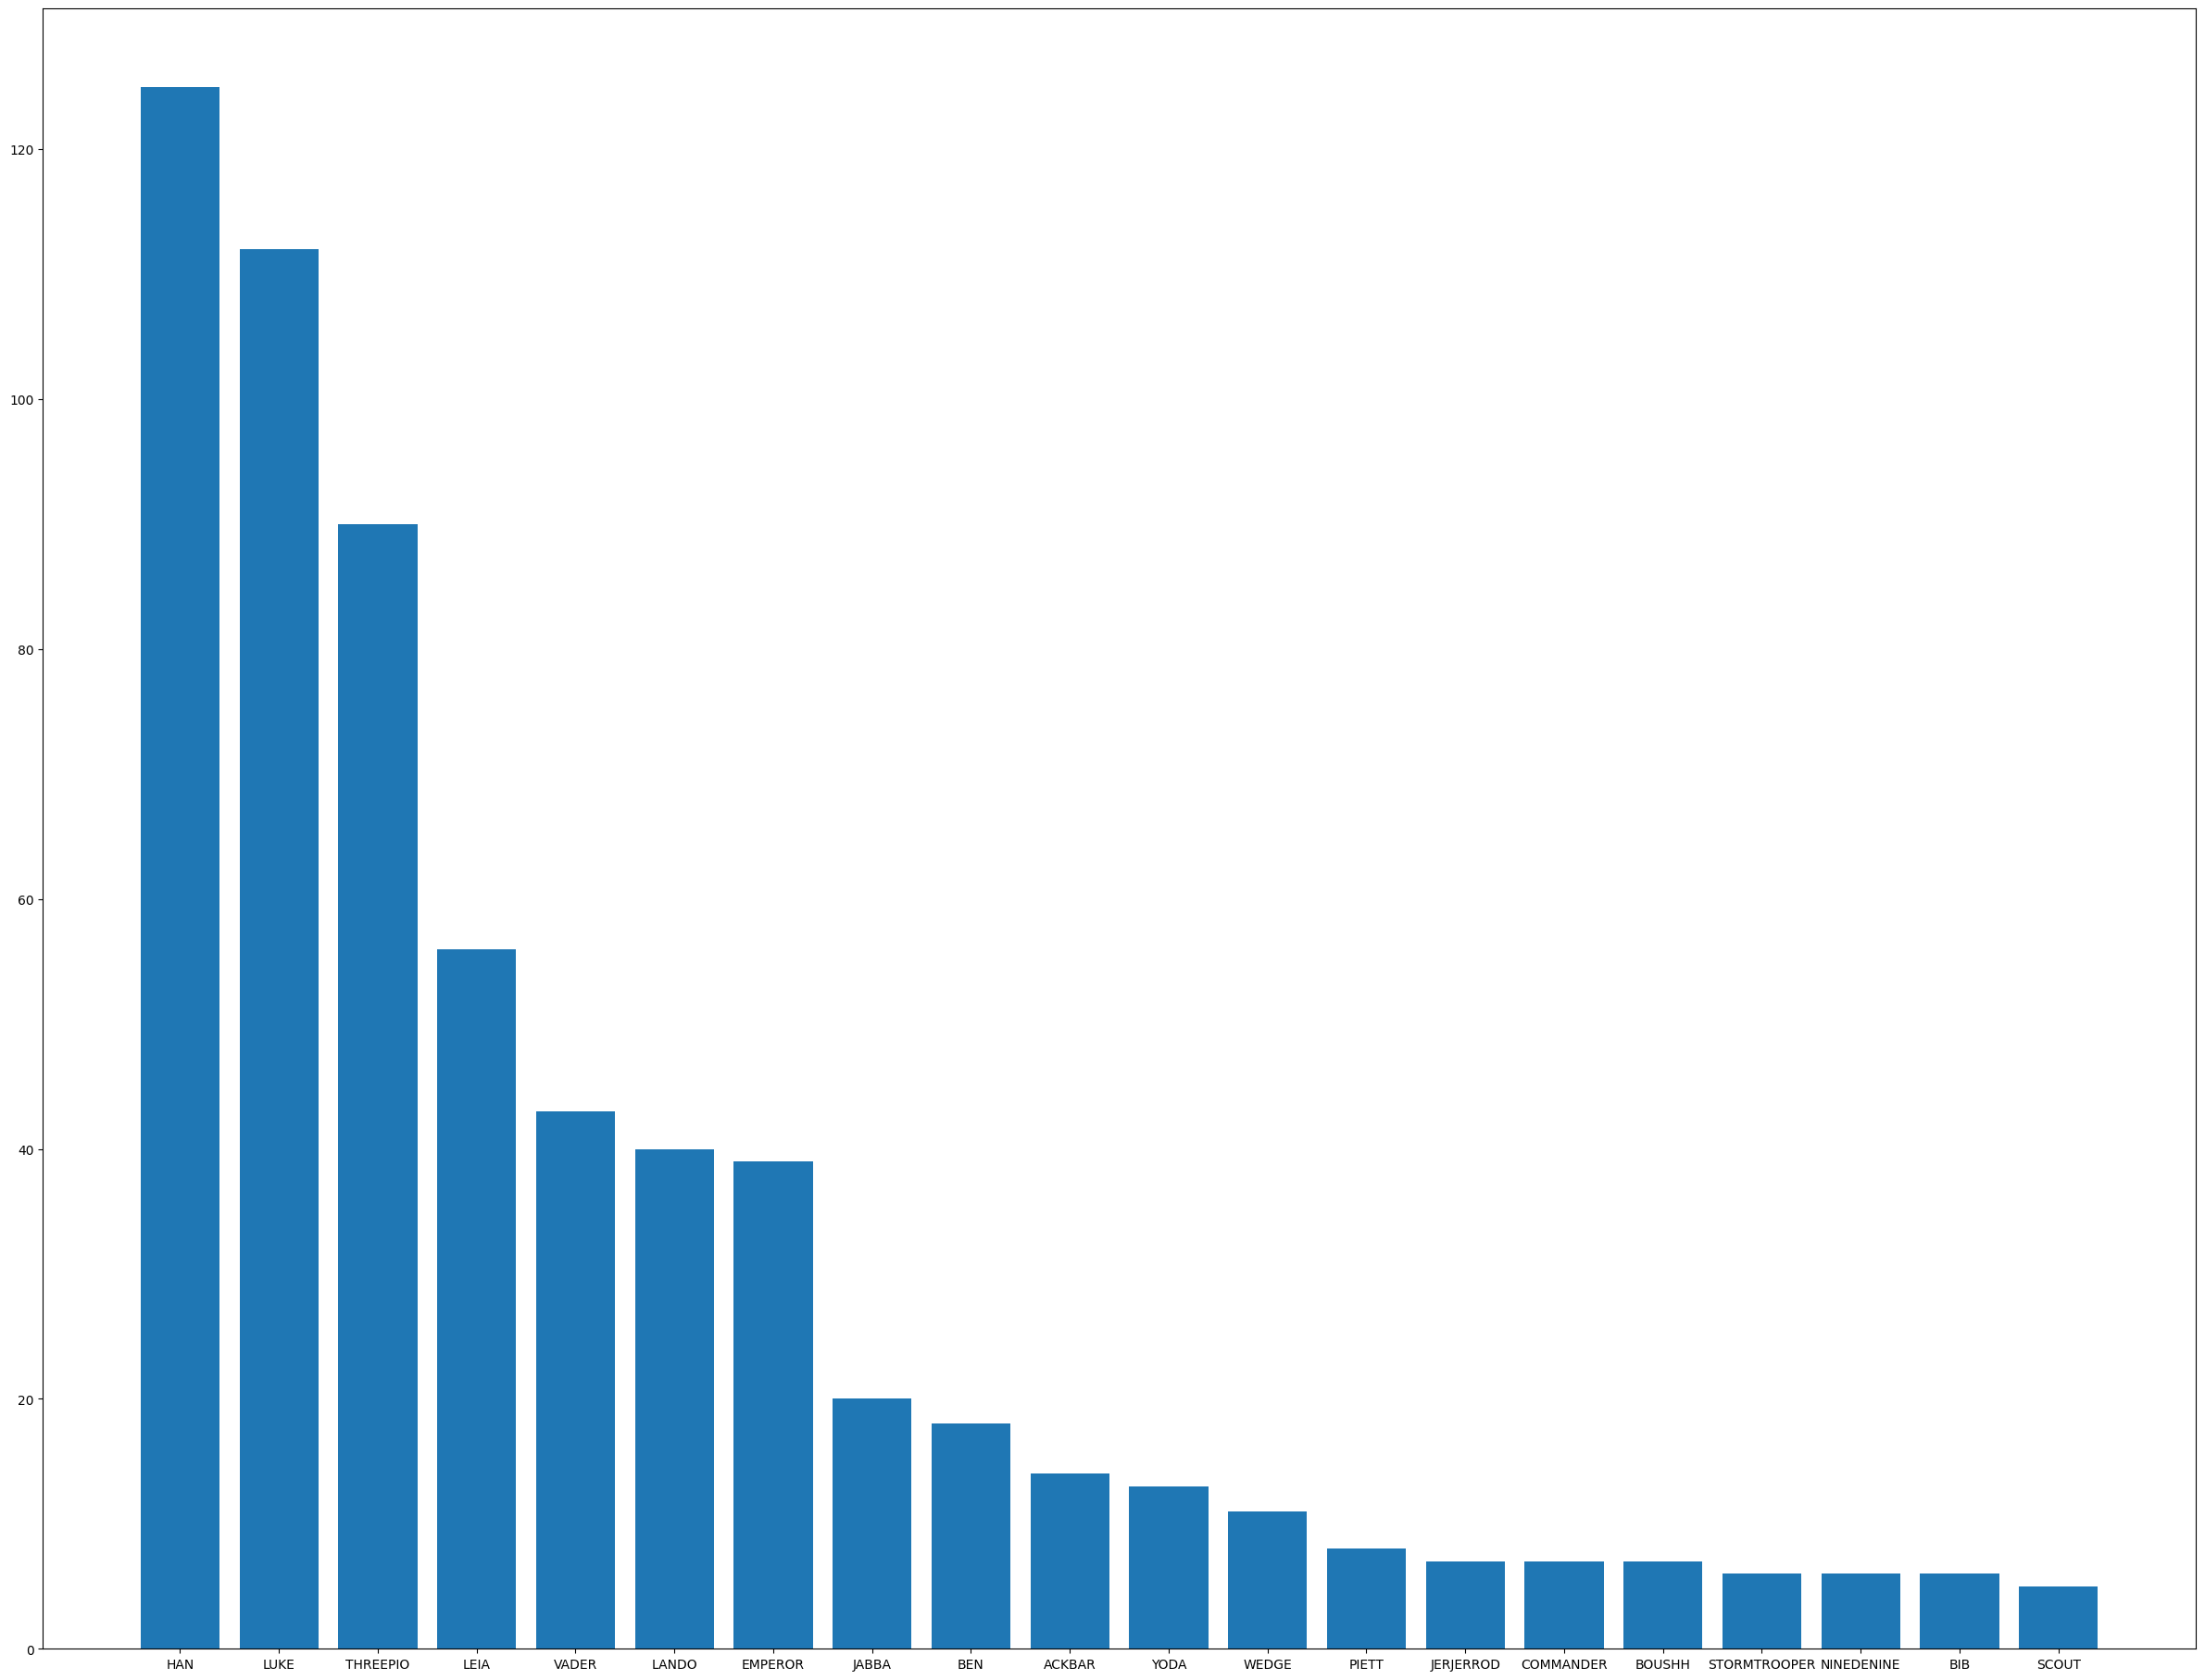

In [22]:
graphic('cluster', 6)

Edisode №_all (local)


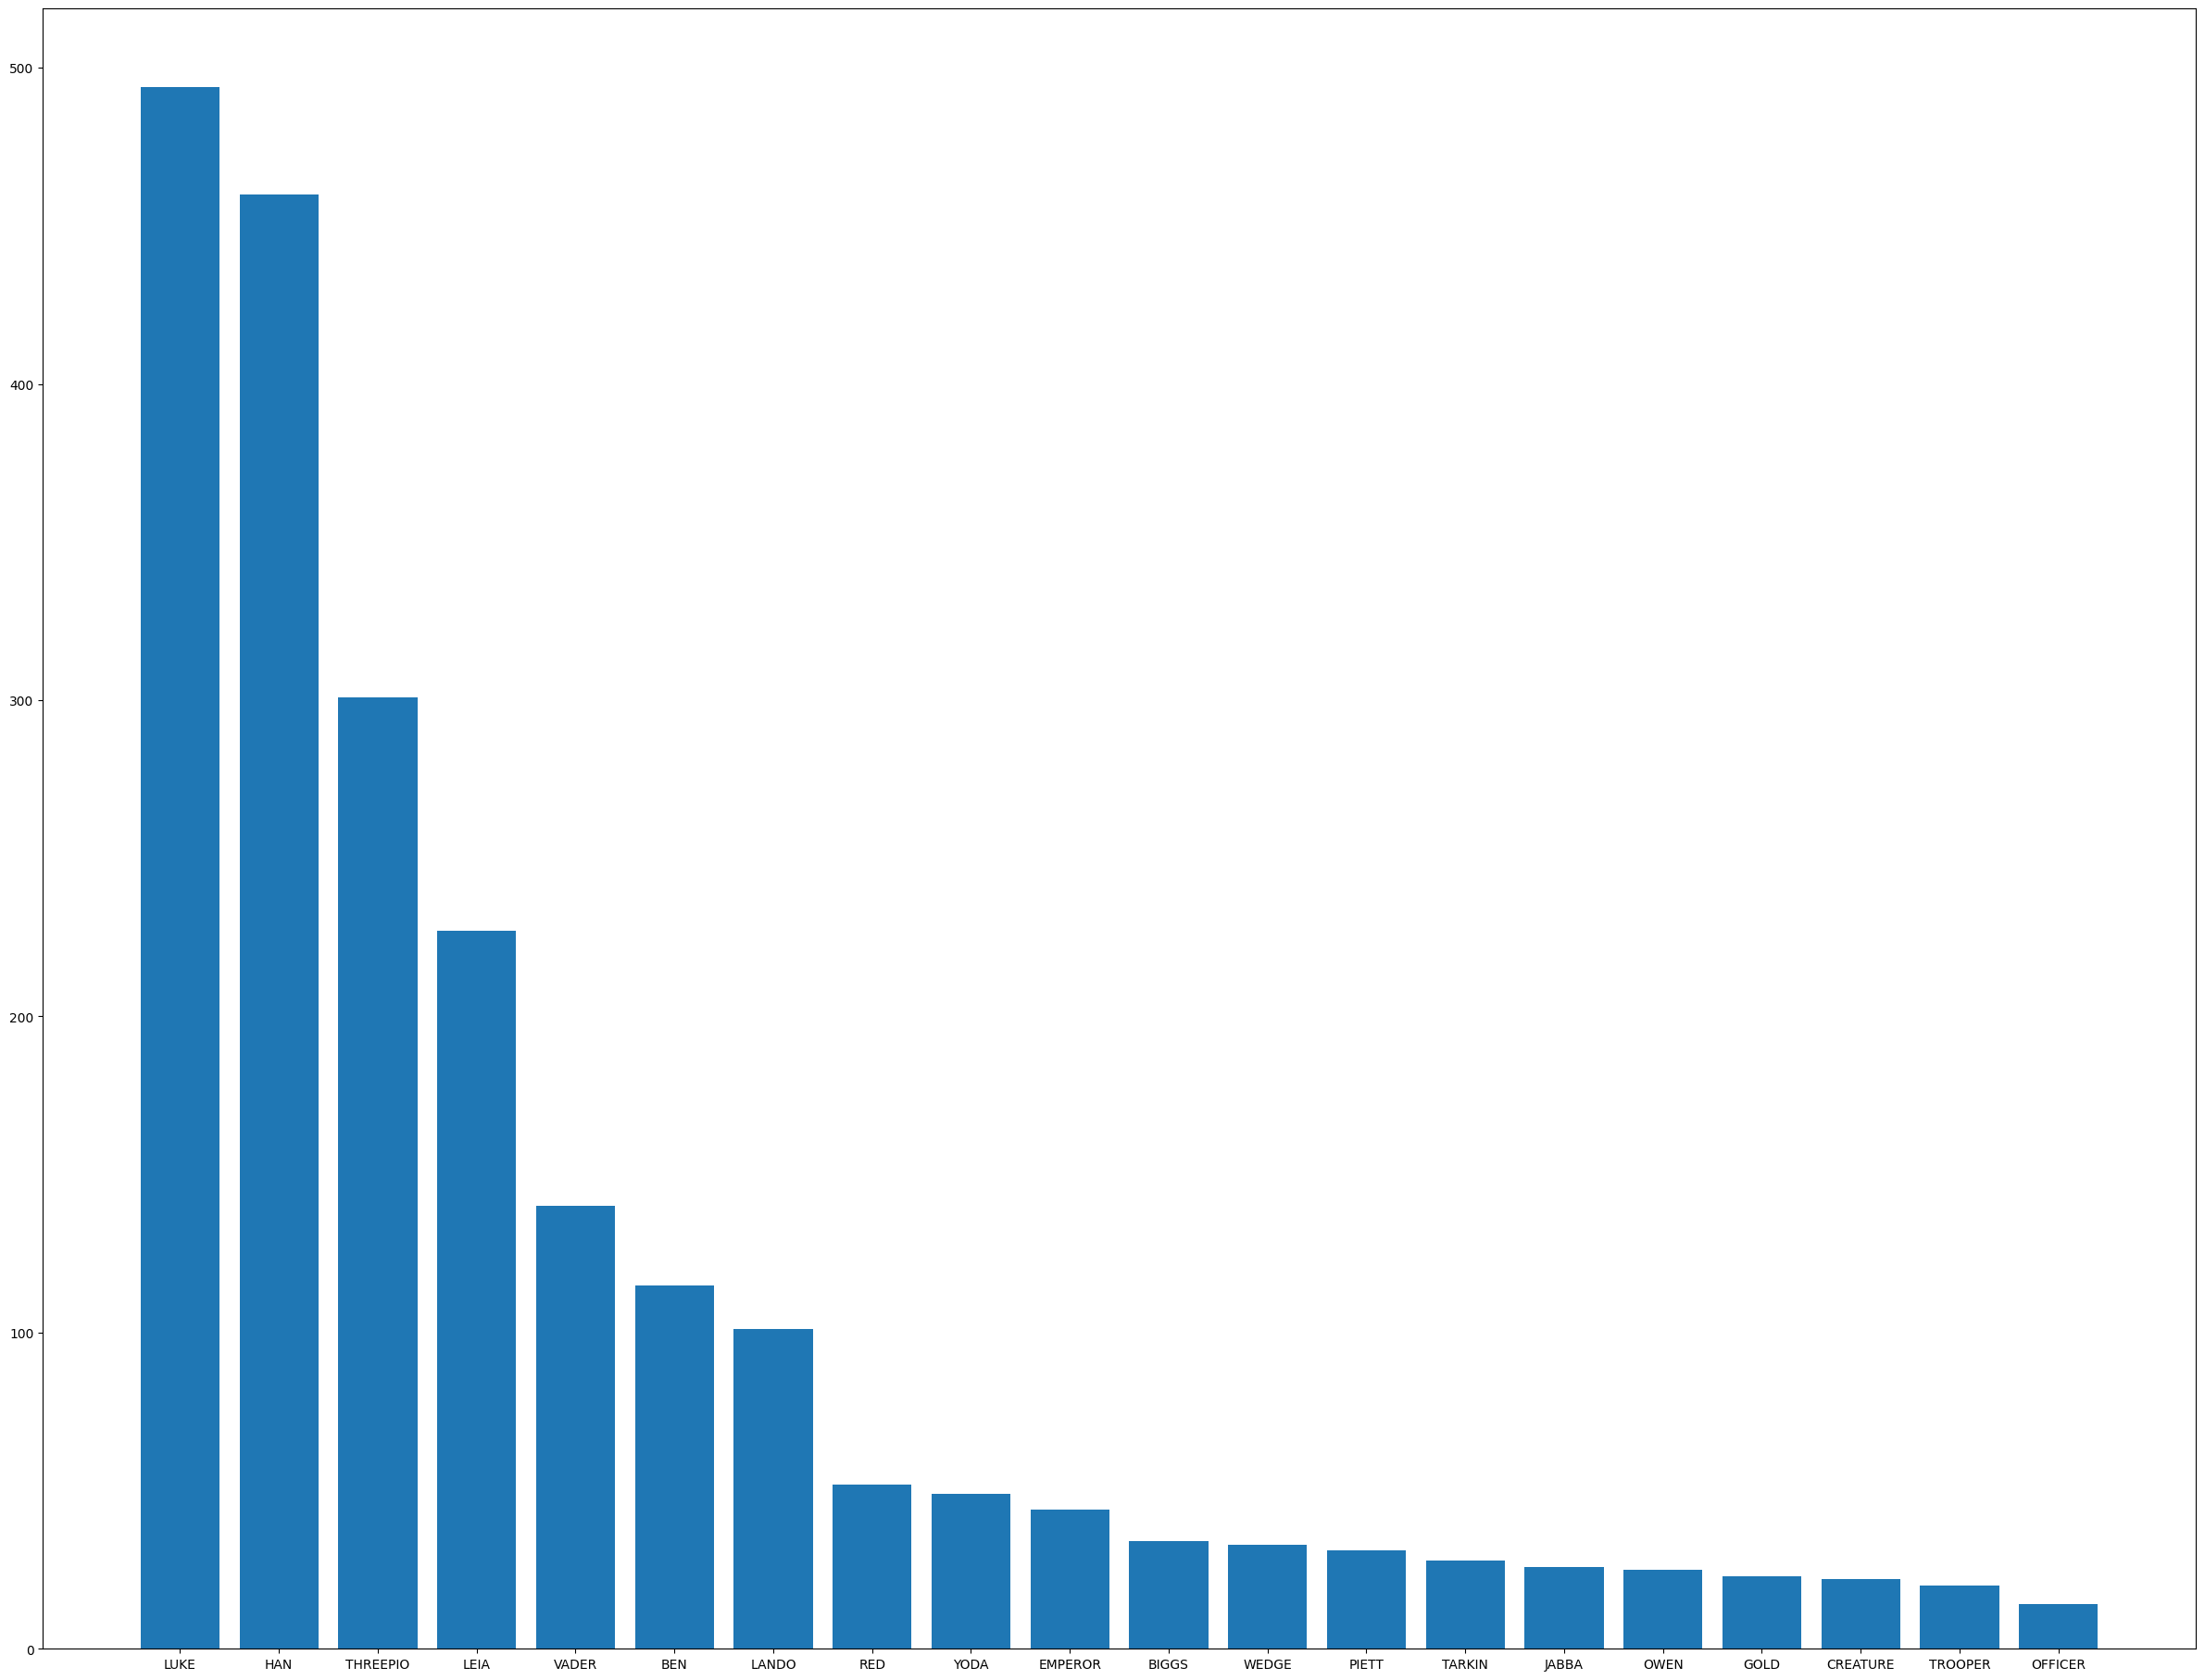

In [23]:
graphic('local', '_all')

In [ ]:
graphic('cluster', '_all')